# Create Network Co-voting


In [2]:
import networkx as nx

import itertools

import matplotlib.pyplot as plt


Load utility functions.

In [3]:
from adsl import pd_read_dir, pd_read_json


In [4]:
# votes = pd_read_dir('../4_power/data/votes/')

In [ ]:
## Cleanup
# votes['proposal'] = votes['proposal'].apply(lambda x :
#                                             None if x is None else x['id'])

# votes['space'] = votes['space'].apply(lambda x :
#                                             None if x is None else x['id'])

# votes['vp'] = votes['vp'].astype(float)

In [ ]:
## May take long.
# votes['space'].value_counts()

We do it only for the votes Load votes of DAO Pancake into dataframe.

In [7]:
pancake_votes = pd_read_json('../4_power/data/snapshot_pancake_votes.json')

In [8]:
pancake_votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99893 entries, 0 to 99892
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              99893 non-null  object 
 1   ipfs            99893 non-null  object 
 2   voter           99893 non-null  object 
 3   created         99893 non-null  int64  
 4   space           99893 non-null  object 
 5   proposal        99893 non-null  object 
 6   choice          99893 non-null  int64  
 7   metadata        99893 non-null  object 
 8   reason          99893 non-null  object 
 9   app             99893 non-null  object 
 10  vp              99893 non-null  float64
 11  vp_by_strategy  99893 non-null  object 
 12  vp_state        99893 non-null  object 
 13  vote_distance   99893 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 10.7+ MB


In [9]:
pancake_votes.head()

,id,ipfs,voter,created,space,proposal,choice,metadata,reason,app,vp,vp_by_strategy,vp_state,vote_distance
0,QmY3RStzfrjtnFUmZvwfriqtobDndKC2v5bY7gGt3yqmdk,QmY3RStzfrjtnFUmZvwfriqtobDndKC2v5bY7gGt3yqmdk,0xfe36132CAa71c4B1A88b38B79373aAb5E001457c,1636888820,pancake,0x8aec905ad562f5a320f7ae7d11d4d3de5eb48c70741b...,-1,{},,,0.001,[0.001],final,0.0
1,QmZh17iC3C8pUD9J9xxCKHwPdtqetbMUyDndd5JdMYkP77,QmZh17iC3C8pUD9J9xxCKHwPdtqetbMUyDndd5JdMYkP77,0xD3815588b090Cd966fA078134517eb091ea5a22c,1636888820,pancake,0x8aec905ad562f5a320f7ae7d11d4d3de5eb48c70741b...,-1,{},,,0.001,[0.001],final,0.0
2,QmbXri9w7yau8mU7J91cRgT3FLNDgaKpm7DbQhESgJnzD6,QmbXri9w7yau8mU7J91cRgT3FLNDgaKpm7DbQhESgJnzD6,0x6e02F9ebcbeA1D919E77d237cD32150d00F41B03,1636888821,pancake,0xc36810958127e4d424b287cf168e972abdc6321403ef...,-1,{},,,0.001,[0.001],final,0.0
3,Qmc885Jdk1qPQLYpWyj2dSSG1azMgCFEtYZrs68tD3uTK5,Qmc885Jdk1qPQLYpWyj2dSSG1azMgCFEtYZrs68tD3uTK5,0x0b0498E4FB7817358fee5B20501DB0cE7e40bA36,1636888821,pancake,0xff8e1a71a0675b8fd96c7828c1df1e0939ac3fc7a90a...,-1,{},,,0.001,[0.001],final,0.0
4,QmdoVaEeaEVC3hnycezMozfQ2gHWCLujcw4bXovaGgtXzz,QmdoVaEeaEVC3hnycezMozfQ2gHWCLujcw4bXovaGgtXzz,0xadEF37Aa14Ef396167982a3c547a0C796C01f28C,1636888821,pancake,0x8aec905ad562f5a320f7ae7d11d4d3de5eb48c70741b...,-1,{},,,0.001,[0.001],final,0.0


In [10]:
pancake_votes.groupby('choice').sum()

,created,vp,vote_distance
choice,,,
-1,160281406994210,84279.228805,77012.315811
0,2799649547786,6899.219862,13089.634021
1,523473244521,441.322793,3094.390140


In [11]:
pancake_votes['vote_prop'] = \
    pancake_votes['choice'].astype(str) + "_" + pancake_votes['proposal']

pancake_votes['vote_prop'].head()

0    -1_0x8aec905ad562f5a320f7ae7d11d4d3de5eb48c707...
1    -1_0x8aec905ad562f5a320f7ae7d11d4d3de5eb48c707...
2    -1_0xc36810958127e4d424b287cf168e972abdc632140...
3    -1_0xff8e1a71a0675b8fd96c7828c1df1e0939ac3fc7a...
4    -1_0x8aec905ad562f5a320f7ae7d11d4d3de5eb48c707...
Name: vote_prop, dtype: object

In [12]:

## Just one proposal, the first.
df = pancake_votes[pancake_votes['proposal'] == pancake_votes['proposal'][0]]
## All proposals.
# df = pancake_votes
len(df)

1947

In [13]:
df.groupby('choice').describe()

created                                                          \
         count          mean           std           min           25%   
choice                                                                   
-1      1947.0  1.636900e+09  73942.412264  1.636889e+09  1.636889e+09   

                                                      vp            ...  \
                 50%           75%           max   count      mean  ...   
choice                                                              ...   
-1      1.636889e+09  1.636890e+09  1.637420e+09  1947.0  0.000506  ...   

                     vote_distance                                     
          75%    max         count mean  std  min  25%  50%  75%  max  
choice                                                                 
-1      0.001  0.001        1947.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 24 columns]

In [ ]:
df.columns

Let's build the graph!

In [19]:
## All votes in pancake.
df = pancake_votes

In [20]:
G = nx.Graph()

def add_edges(v):
    for x in itertools.combinations(v, 2):
        edge_data = G.get_edge_data(x[0], x[1])
        if edge_data is None:
            G.add_edge(x[0], x[1], weight=1)
        else:
            edge_data['weight'] += 1

df.groupby(['proposal', 'choice'])['voter'].apply(add_edges)

proposal                                                            choice
0x0080bf7adf9b5ba352357dddf40d1e310e8b5dce6006f85d26478158cf772771  -1        None
                                                                     0        None
0x00930cb5b62946e781efd6f6c9b75ec2ba5124946df3fe67889039ace5a9a1c9  -1        None
0x00b5d4d37772a74aa57524155d991d529c6adfe03b2c7c5b1681f69815f8ee98  -1        None
0x00c6aa7b422d0a06936ee26bfeb68923c04be00ac96aa83976296dcfd496caa3  -1        None
                                                                              ... 
QmXzGA6ktqQFc6G29ig5j1gvzELmHz4VwerGCwtKEEHXXv                       0        None
QmYVW44Zxh89beXHwuTJVPw9c3CvVacdA9KASDfGrvLbGX                      -1        None
QmeSLGYchkP7htAEnUGMmomKHiYJbgEeYv7nVJvCQrGae6                      -1        None
                                                                     0        None
                                                                     1        None
Name: voter,

In [21]:
G.number_of_nodes(), G.number_of_edges()

(5663, 2804227)

In [22]:
nx.density(G)

0.17491487156929664

In [23]:
Gcc = nx.connected_components(G)


In [25]:
len(list(Gcc))

11

In [24]:
## Get the giant component.
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)


In [25]:
giant_component = G.subgraph(Gcc[0])

In [26]:
giant_component.number_of_edges(), giant_component.number_of_nodes()

(2794040, 5460)

In [27]:
# smallest_component = G.subgraph(Gcc[len(list(Gcc))-1])
smallest_component = G.subgraph(Gcc[1])

In [28]:
smallest_component.number_of_edges(), smallest_component.number_of_nodes()

(9730, 140)

In [29]:
sorted_edges = sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1), reverse=True)

In [30]:
sorted_edges

[('0xF335baa6e6aD984150A8526238808d2BfF69869d',
  '0x0D1456A83CE96e010dB1fCBa4e71Bbc6c3A18452',
  {'weight': 164}),
 ('0xF335baa6e6aD984150A8526238808d2BfF69869d',
  '0x060bBb0BCc744293A1E7dF8Dd7Cc2EC81951BF94',
  {'weight': 162}),
 ('0xF335baa6e6aD984150A8526238808d2BfF69869d',
  '0xda428bE4F8E0Ec294FC0647690073895F406C659',
  {'weight': 162}),
 ('0xF335baa6e6aD984150A8526238808d2BfF69869d',
  '0x39643F31647D78Fe1cCfbd9B95c1155262a0f55C',
  {'weight': 157}),
 ('0x060bBb0BCc744293A1E7dF8Dd7Cc2EC81951BF94',
  '0xda428bE4F8E0Ec294FC0647690073895F406C659',
  {'weight': 153}),
 ('0x39643F31647D78Fe1cCfbd9B95c1155262a0f55C',
  '0xda428bE4F8E0Ec294FC0647690073895F406C659',
  {'weight': 152}),
 ('0xf8aFa6338e9FAbaFC49469c32F5fBFe911ea7c04',
  '0xda428bE4F8E0Ec294FC0647690073895F406C659',
  {'weight': 152}),
 ('0x924F17026aB7e01147F892c3684c85F758775701',
  '0xF335baa6e6aD984150A8526238808d2BfF69869d',
  {'weight': 150}),
 ('0x39643F31647D78Fe1cCfbd9B95c1155262a0f55C',
  '0x060bBb0BCc744293A1E

In [38]:
weights = [link[2]['weight'] for link in sorted_edges]


(array([6.27069e+05, 2.68180e+04, 5.74300e+03, 1.56562e+05, 9.47289e+05,
        3.15030e+05, 1.47036e+05, 1.71000e+03, 1.59700e+03, 5.17500e+03,
        3.98700e+03, 1.31890e+04, 1.99010e+04, 1.26940e+04, 3.07790e+04,
        3.57780e+04, 1.88100e+04, 3.76270e+04, 1.86040e+04, 3.48350e+04,
        3.15670e+04, 1.47550e+04, 2.65740e+04, 2.44830e+04, 1.16810e+04,
        2.22430e+04, 2.18590e+04, 1.08980e+04, 2.16810e+04, 1.06670e+04,
        2.17080e+04, 2.14510e+04, 1.03780e+04, 1.97090e+04, 1.81120e+04,
        8.35600e+03, 1.45260e+04, 6.03500e+03, 9.97100e+03, 6.84300e+03,
        2.45900e+03, 3.48900e+03, 2.07300e+03, 6.77000e+02, 8.08000e+02,
        2.49000e+02, 3.08000e+02, 1.61000e+02, 4.20000e+01, 5.60000e+01,
        3.30000e+01, 9.00000e+00, 2.20000e+01, 1.30000e+01, 1.00000e+00,
        5.00000e+00, 3.00000e+00, 1.00000e+00, 3.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00,
        1.00000e+00, 9.00000e+00, 2.00000e+00, 8.00

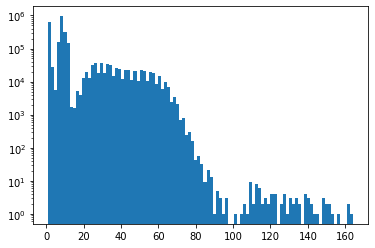

In [39]:
plt.hist(weights, bins=100, log=True)

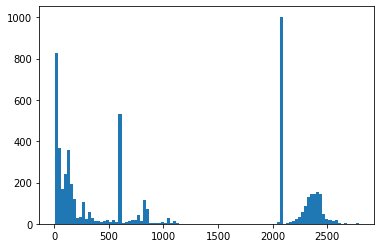

In [39]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, bins=100)

plot_degree_dist(G)

Text(0, 0.5, 'Frequency')

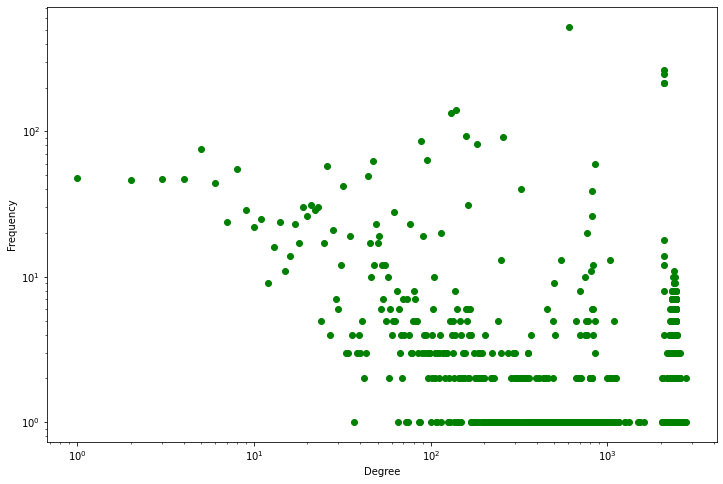

In [42]:
m=1
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[m:], degree_freq[m:],'go') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [43]:
nx.density(G)

0.17491487156929664

In [44]:
## Clustering for every node.
## nx.clustering(G)

nx.average_clustering(G)

KeyboardInterrupt: 

#### Pruning

Remove let's relevant edges.


In [40]:
G2 = G.copy()
print(G2.number_of_edges())

T = 50
for edge in G2.edges:
    edge_data = G2.get_edge_data(edge[0], edge[1])
    if edge_data['weight'] < T:
        G2.remove_edge(edge[0], edge[1])


G2.number_of_edges()


2804227


147586

In [113]:
## We can also remove nodes.

# print(G2.number_of_nodes())
# T = 1000
# to_remove = []
# for node in G2.nodes:
#     if G2.degree(node) <= T:
#        to_remove.append(node)

# G2.remove_nodes_from(to_remove)

# G2.number_of_nodes()

5663


2060

In [41]:
nodes = max(nx.connected_components(G2), key=len)
H = nx.subgraph(G, nodes)

In [42]:
H.number_of_edges(), H.number_of_nodes()

(342378, 828)

In [44]:
nx.diameter(H)

1

In [61]:
nx.write_gexf(H, "data/pancake_covoting_network_pruned_edges_50_giant.gexf")

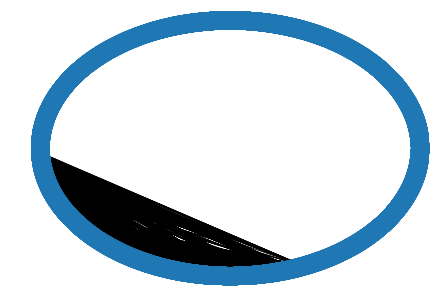

In [48]:
nx.draw_shell(G2)

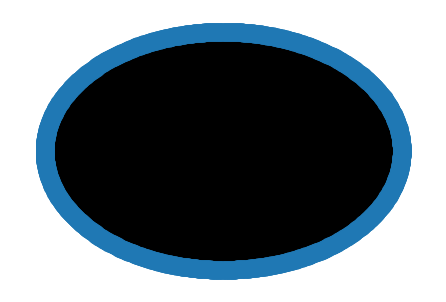

In [49]:
nx.draw_shell(H)

In [51]:
## Defining common options for all our plots.
opts = {
    'node_size': 30,
    'width': 0.2,       ## edges lines' width
    'alpha': 0.5
}

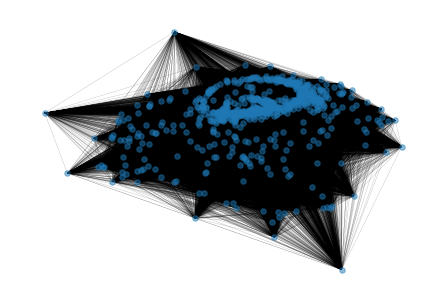

In [52]:
nx.draw_spring(H, **opts)

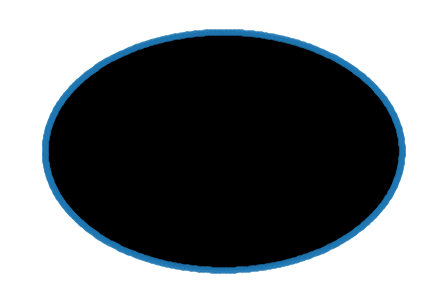

In [53]:
nx.draw_circular(H, **opts)

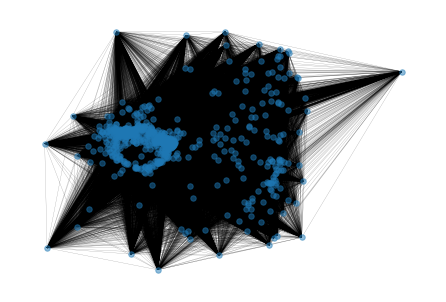

In [54]:
nx.draw_spring(H, **opts)